# MOVIE RATING PREDICTION WITH PYTHON

### We need to build a model that predicts the rating of a movie based on features like genre, director, and actors. 

# Importing Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
There are 3 datasets for the prediction
- Movie 
- Ratings
- Users

In [17]:
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python',encoding='latin-1')
df_movie.columns =['MovieIDs','MovieName','Genre']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [18]:
df_movie.shape

(3882, 3)

In [19]:
df_movie.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [20]:
# checking null values
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [21]:
df_ratings=pd.read_csv('ratings.dat', sep = '::', engine='python',encoding='latin-1')
df_ratings.columns =['UserID','MovieID','Ratings','TimeStamp']
df_ratings.dropna(inplace=True)
df_ratings.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [22]:
df_ratings.shape

(1000208, 4)

In [23]:
df_ratings.describe()

,UserID,MovieID,Ratings,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [24]:
# checking null values
df_ratings.isna().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [27]:
df_users=pd.read_csv('users.dat', sep = '::', engine='python',encoding='latin-1')
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [28]:
df_users.shape

(6039, 5)

In [29]:
df_users.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [30]:
# checking null values
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# Data Processing 

In this we converted the Gender from String to number (1-0) for easier calculation. This is performed using LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_users['Gender']=labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [32]:
# checking null values
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

## concatenating the datasets

In [34]:
df_data=pd.concat([df_movie,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)

,MovieIDs,MovieName,Genre,UserID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,0.0,25.0,1.0,04093


In [35]:
df_data.shape

(1000208, 12)

## removing unnecessary columns
Columns like Occupation, Zip-code and Timestamp have no relevance in the analysis so it is better to drop the columns. 

In [48]:
df2 = df_data.drop(['Occupation','Zip-code','TimeStamp'],axis=1)
df2.head()

,MovieIDs,MovieName,Genre,UserID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [49]:
df2.describe()

,MovieIDs,UserID,MovieID,Ratings,UserID,Gender,Age
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,3021.000000,0.717172,30.644146
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1743.453469,0.450411,12.891387
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000,0.000000,1.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,1511.500000,0.000000,25.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,3021.000000,1.000000,25.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,4530.500000,1.000000,35.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000


In [50]:
#checking null values
df2.isna().sum()

MovieIDs     996326
MovieName    996326
Genre        996326
UserID            0
MovieID           0
Ratings           0
UserID       994169
Gender       994169
Age          994169
dtype: int64

**Conclusion:** The result of the null values is quite unexpected because for individual datasets there were no null values but here we can see that there are lots of null values because different datasets have different no. of rows that's why the left over values are kept null. So therefore, we can drop these null values without hesitation. 

In [51]:
#handling missing values
df_final=df2.dropna()

In [52]:
df_final.shape

(3882, 9)

# visulaizing the preprocessed data

First visulization is done on Gender with Ratings using countplot

<Axes: xlabel='Gender', ylabel='count'>

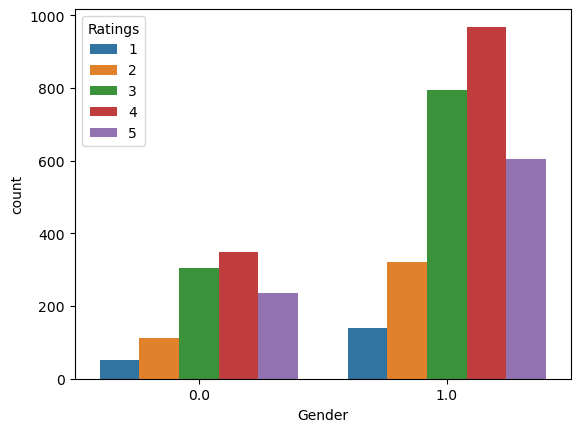

In [53]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

**Conclusion:** From the plot we can see that Female(0) are contributing less as comparison to Male(1). 

Now we have visulaized on age with MovieIDs and Ratings using histplot.

Text(0.5, 0, 'Ratings')

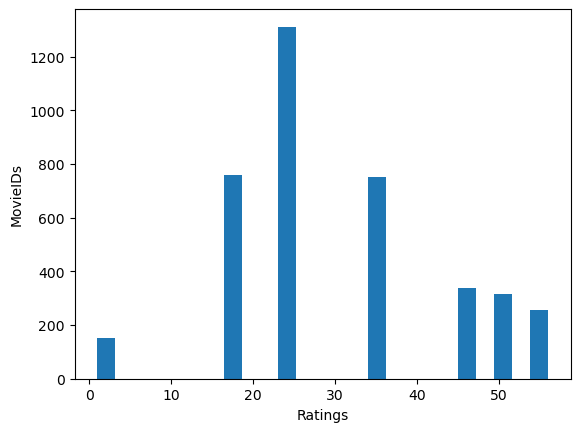

In [54]:
df_final.Age.plot.hist(bins=25)
plt.ylabel('MovieIDs')
plt.xlabel('Ratings')

**Conclusion:** From the graph we can see that people of age 20-30 have contributed more in ratings. 

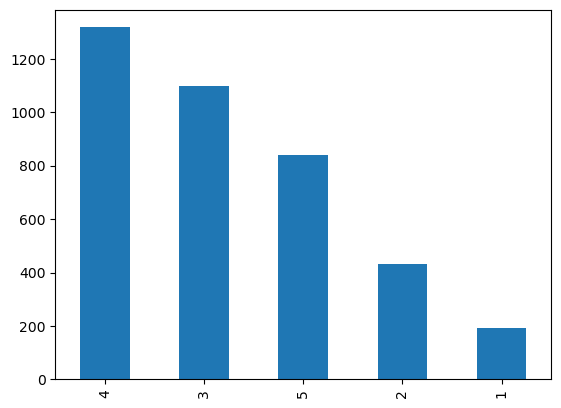

In [55]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

**Conclusion:** From the bargraph we can see that number 4 rating is the most rated by the people. 

Text(0, 0.5, 'Ratings')

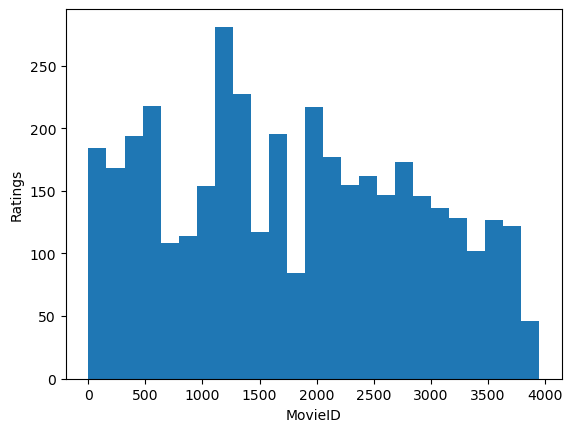

In [56]:
df_final['MovieID'].plot.hist(bins=25)
plt.xlabel('MovieID')
plt.ylabel('Ratings')

**Conclusion:** From the above graph it is difficult to conclude anything so it would be better if we drop 'MovieID' column later on. 

<Axes: ylabel='Frequency'>

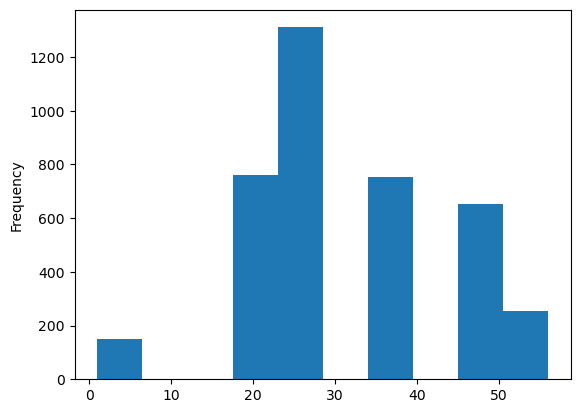

In [57]:
df_final['Age'].plot.hist(bins=10)

<Axes: xlabel='Age', ylabel='count'>

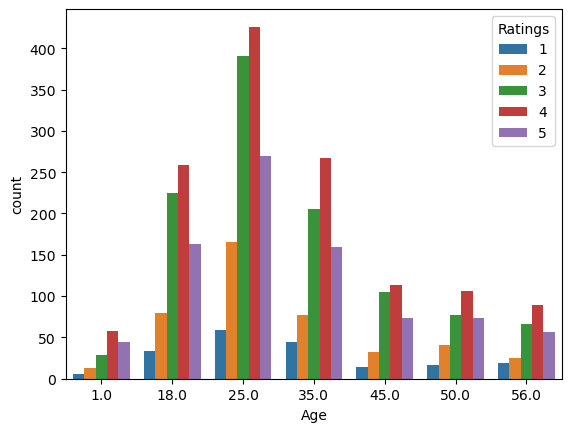

In [58]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

**Conclusion:** From the plot we can see that age=25 have give the most of the rating=4.

## final dataset

In [59]:
df_final.head()

,MovieIDs,MovieName,Genre,UserID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [62]:
input = df_final.drop(['Ratings','MovieName','Genre','MovieIDs'],axis=1)
target=df_final['Ratings']
target.head()

0    3
1    3
2    4
3    5
4    3
Name: Ratings, dtype: int64

In [63]:
input.head()

,UserID,MovieID,UserID,Gender,Age
0,1,661,2.0,1.0,56.0
1,1,914,3.0,1.0,25.0
2,1,3408,4.0,1.0,45.0
3,1,2355,5.0,1.0,25.0
4,1,1197,6.0,0.0,50.0


## training the model 

### First we are using MinMaxScaler for our data 
to range our data from 0-1 and get the accuracy level.

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,columns=input.columns)
scaled_df.head()

,UserID,MovieID,UserID,Gender,Age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(input,target,test_size=0.3)

In [67]:
print(Y_train)

3542    1
295     3
2578    4
2500    3
3237    3
       ..
624     4
1142    4
3456    3
1178    3
2229    3
Name: Ratings, Length: 2717, dtype: int64


In [68]:
print(Y_test)

1392    2
1385    4
2605    4
35      5
2447    4
       ..
1904    4
1605    3
400     3
2195    5
352     4
Name: Ratings, Length: 1165, dtype: int64


### Now using LogisticRegression 

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
X_test = np.array(X_test)

In [71]:
#model Prediction
model.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [72]:
print(Y_test)

1392    2
1385    4
2605    4
35      5
2447    4
       ..
1904    4
1605    3
400     3
2195    5
352     4
Name: Ratings, Length: 1165, dtype: int64


**Conclusion:** Therefore, we can conclude that the Logistic Regression model is best for our data set for the prediction of movie rating. 